### Moving Average Models

The AR models do a pretty good job predicting the stationary time series, but as we can see from the residual curves, the quality of prediction deteriorates when there are sudden changes in values. Moving average models address this issue by taking into account the size of prediction errors, when predicting the current value.

$r_{t} = c + \theta_{1} \epsilon_{t-1} + \epsilon_{t}$

To chose the appropriate number of lags in the MA model, we use ACF instead of PACF, as we would like to consider the direct and the indirect affect of the lags.

The parameters of the ARIMA(p,d,q) model are defined as follows:- 
* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [3]:
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format = "%d/%m/%Y")
df_comp.set_index("date",inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [4]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [5]:
df['returns'] = df.market_value.pct_change(1) * 100

C:\Users\Admin\AppData\Local\Temp/ipykernel_5344/927300507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1) * 100


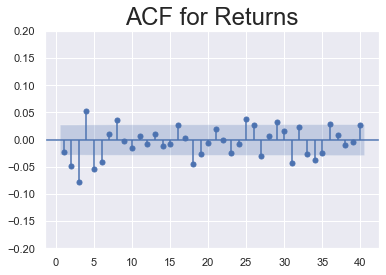

In [9]:
sgt.plot_acf(df.returns[1:],lags=40,zero=False)
plt.title('ACF for Returns',size=24)
plt.ylim(-0.2,0.2)
plt.show()

### MA(1) for returns

In [12]:
model_ret_ma_1 = ARIMA(df.returns[1:],order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Sun, 21 Nov 2021   AIC                          15865.190
Time:                        15:36:49   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model_ret_ma_2 = ARIMA(df.returns[1:],order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Sun, 21 Nov 2021   AIC                          15853.728
Time:                        15:48:27   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.000      -0.066      -0.035
sigma2         1.3753      0.014     99.021      0.000       1.348       1.402
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7657.23
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
LLR_test(model_ret_ma_1,model_ret_ma_2)

0.0

In [18]:
model_ret_ma_3 = ARIMA(df.returns[1:],order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_2,model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Sun, 21 Nov 2021   AIC                          15818.634
Time:                        15:54:49   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

In [20]:
model_ret_ma_4 = ARIMA(df.returns[1:],order=(0,0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_3,model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Sun, 21 Nov 2021   AIC                          15809.547
Time:                        15:56:04   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

In [21]:
model_ret_ma_5 = ARIMA(df.returns[1:],order=(0,0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_4,model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Sun, 21 Nov 2021   AIC                          15799.645
Time:                        15:56:55   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

In [22]:
model_ret_ma_6 = ARIMA(df.returns[1:],order=(0,0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_5,model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Sun, 21 Nov 2021   AIC                          15794.442
Time:                        15:58:08   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [23]:
model_ret_ma_7 = ARIMA(df.returns[1:],order=(0,0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_6,model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Sun, 21 Nov 2021   AIC                          15796.091
Time:                        15:59:11   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [24]:
model_ret_ma_8 = ARIMA(df.returns[1:],order=(0,0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_7,model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Sun, 21 Nov 2021   AIC                          15791.205
Time:                        16:00:54   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [26]:
LLR_test(model_ret_ma_6,model_ret_ma_8,DF=2)

0.027

### Results of the Models.

Our conditions fail at MA(7). ie. with LLR p value of 0.554, MA(7) is not better than MA(6), but the ACF graph tells us that while LAG 7 is insignificant, LAG 8 is not. So, we break our rule to check for MA(8), and as expected, we find that MA(8) is not only better than MA(7), it is also better than MA(6). 

Models with lags greater than MA(8) are unlikely to be better as we don't observe significant auttocorrelations for LAGS > 8, in the ACF plot.

Also, note that in the L8 model, coefficients except L1 and L7 are significant, same as suggested by the ACF plot.
